## Domača naloga 6
Marko Tacer, 23222087

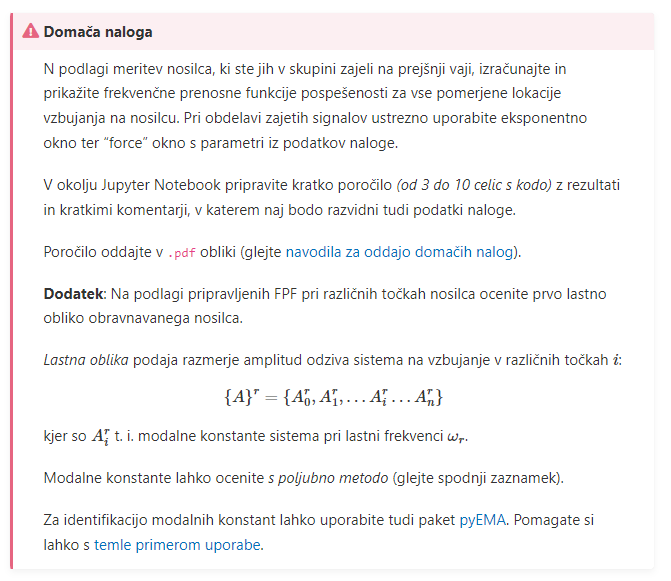

Podatki: \
eksponentno okno: $p = 0,14$\
force okno: $I_w = 0,2$

In [2]:
p = 0.14 
I_w = 0.2

Pri vaji smo analizirali enostaven jeklen nosilec. Na začetno mesto smo pritrdili naš pospeškomer in z modalnim kladivom nosilec vzbujali v 10-ih zaporednih točkah. Na vsakem mestu smo naredili več meritev, da zagotovimo, da imamo pri vseh točkah najmanj eno kvalitetno meritev (ni dvojnega udarca ipd). Iz vsake točke smo vzeli eno dobro meritev, ki smo jo nadalje obdelali.

In [3]:
import lvm_read
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
%matplotlib inline

### Časovne vrste in amplitudni spektri

Na spodnjem grafu so prikazani časovne vrste sil in odzivov na vseh merjenih točkah. Ker so časovno zamaknjene jih pri izrisu časovno poravnamo. Na levi so grafi za vse točke in na desni graf za mojo točko - točko $\textbf{10}$

In [4]:
j = ([0, 1, 0, 2, 4, 0, 3, 2, 10, 1])   # Indeksi izbranega segmenta za posamezno točko 

In [5]:
h=9
file = f'{h+1}signal.lvm'
loaded_data = lvm_read.read(file)
S = loaded_data[j[h]]['data'].T
tao = S[0][0]   # Ker so signali "ne poravnani" jih poravnam na skupen začetni čas
tao

8.311055

51200

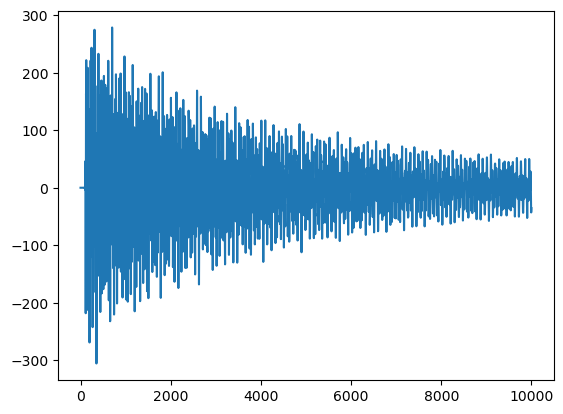

In [6]:
plt.plot(S[2][:10000])
S[2].size

In [24]:
def FPF(file_path, index=0):
    '''
    index: segment
    S[0] čas
    S[1] sila
    S[2] odziv (pospešek)
    
    return FPF, h, X_a, X_f
    '''
    
    # file_path = f'{h+1}signal.lvm'
    loaded_data = lvm_read.read(file_path)
    S = loaded_data[index]['data'].T
    tao = S[0][0] # začetni čas t0
    t = S[0] - tao
    
    x_f = S[1]
    x_a = S[2]
    
    dt = t[1] - t[0]
    freq = np.fft.rfftfreq(len(t), dt)
    
    X_a = np.fft.rfft(S[2], norm="forward");
    X_f = np.fft.rfft(S[1], norm="forward");
    FPF = X_a/X_f
    h = np.fft.irfft(FPF);
    return FPF, h, X_a, X_f, freq, x_f, x_a, t      

In [25]:
FPF10, h10, X_a10, X_f10, freq10, x_f10, x_a10, t10  = FPF(file_path='10signal.lvm', index=j[9])

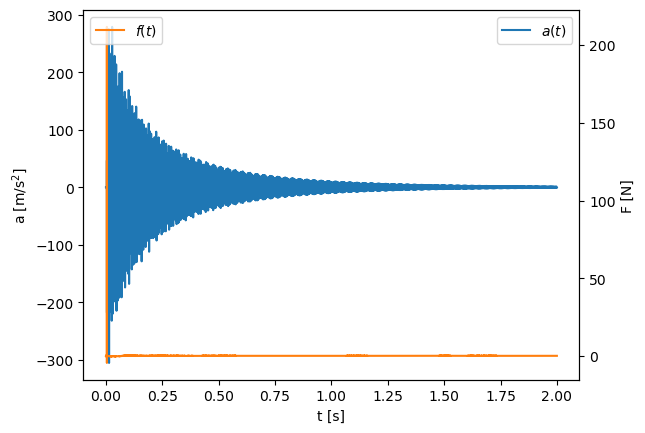

In [27]:
p = 0.2 # 1 %
t = t10
tau = -(len(t) - 1) / np.log(p)
w_exponential = signal.windows.exponential(len(t), center=0, tau=tau, sym=False)
w_exponential[-1]

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t10, x_a10, alpha=1, label='$a(t)$')
ax2.plot(t10, x_f10, alpha=1, c='C1', label='$f(t)$')

ax.legend(loc=1)
ax2.legend(loc=2)

ax2.set_ylabel('F [N]')
ax.set_ylabel('a [m/s$^2$]')
ax.set_xlabel('t [s]');

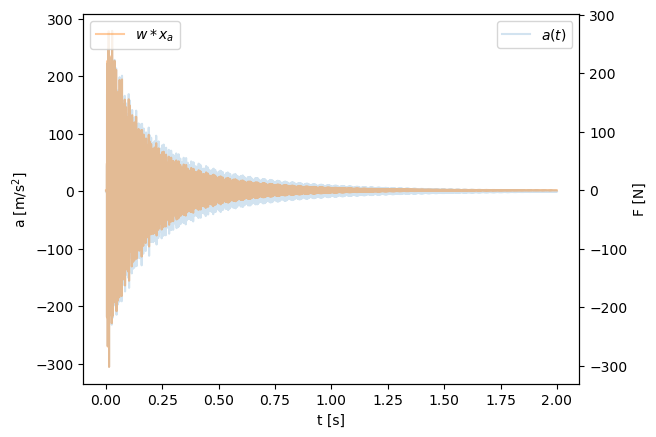

In [30]:
p = 0.2 # 1 %
t = t10
tau = -(len(t) - 1) / np.log(p)
w_exponential = signal.windows.exponential(len(t), center=0, tau=tau, sym=False)
w_exponential[-1]

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t10, x_a10, alpha=0.2, label='$a(t)$')
ax2.plot(t10, w_exponential*x_a10, alpha=0.4, c='C1', label='$w*x_a$')

ax.legend(loc=1)
ax2.legend(loc=2)

ax2.set_ylabel('F [N]')
ax.set_ylabel('a [m/s$^2$]')
ax.set_xlabel('t [s]');

In [ ]:
FPF_okno = np.fft.rfft( h*w_exponential)
FPF_okno.size, FPF10.size

(25601, 25601)

(1000.0, 3000.0)

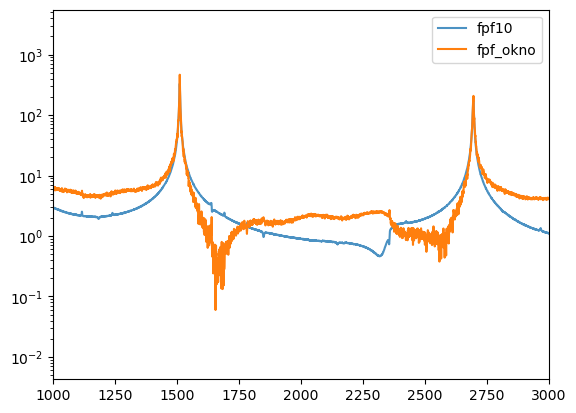

In [ ]:
plt.semilogy(freq10, abs(FPF10), alpha=0.8, label='fpf10')
plt.semilogy(freq10, abs(FPF_okno), label='fpf_okno')
plt.legend()
plt.xlim(1000, 3000)

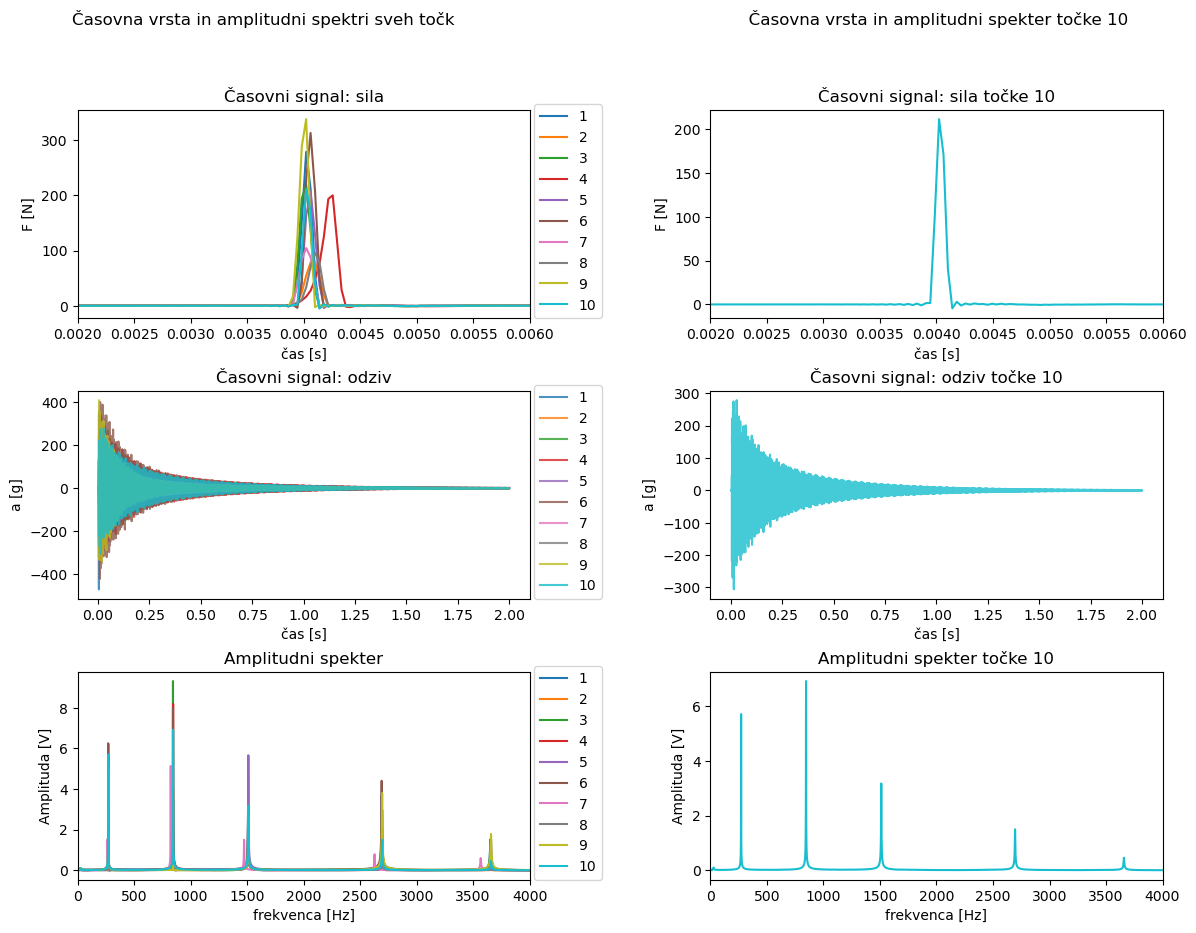

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(14,10))
fig.suptitle('Časovna vrsta in amplitudni spektri sveh točk                       \
                                 Časovna vrsta in amplitudni spekter točke 10 ')
for h in np.arange(10):
    
    file = f'{h+1}signal.lvm'
    loaded_data = lvm_read.read(file)
    S = loaded_data[j[h]]['data'].T
    tao = S[0][0]   # Ker so signali "ne poravnani" jih poravnam na skupen začetni čas
    
    axs[0, 0].set_title(f'Časovni signal: sila')
    axs[0, 0].plot(S[0]-tao, S[1], color=f'C{h}', label=f'{h+1}')
    axs[0, 0].set_xlabel('čas [s]')
    axs[0, 0].set_ylabel('F [N]')
    axs[0, 0].set_xlim(0.002, 0.006)
    axs[0, 0].legend(loc=(1.01,0))

    dt = S[0][1] - S[0][0]
    freq_1 = np.fft.rfftfreq(len(S[0]), dt)
    X_1 = np.fft.rfft(S[2], norm="forward"); 

    axs[1, 0].set_title(f'Časovni signal: odziv')
    axs[1, 0].plot(S[0]-tao, S[2], alpha=.8, color=f'C{h}', label=f'{h+1}')
    axs[1, 0].set_xlabel('čas [s]')
    axs[1, 0].set_ylabel('a [g]')
    axs[1, 0].legend(loc=(1.01,0))

    axs[2, 0].set_title(f'Amplitudni spekter')
    axs[2, 0].plot(freq_1, abs(X_1), color=f'C{h}', label=f'{h+1}')
    axs[2, 0].set_xlabel('frekvenca [Hz]')
    axs[2, 0].set_ylabel('Amplituda [V]')
    axs[2, 0].set_xlim(0, 4000)
    axs[2, 0].legend(loc=(1.01,0))

file = f'{10}signal.lvm'
loaded_data = lvm_read.read(file)
S10 = loaded_data[j[9]]['data'].T
tao10 = S10[0][0]

fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.35)
# Graf moje izmerjene točke
axs[0, 1].set_title(f'Časovni signal: sila točke 10')
axs[0, 1].plot(S10[0]-tao10, S10[1], color=f'C{10-1}', label=f'Točka {10}')
axs[0, 1].set_xlabel('čas [s]')
axs[0, 1].set_ylabel('F [N]')
axs[0, 1].set_xlim(0.002, 0.006)

axs[1, 1].set_title(f'Časovni signal: odziv točke 10')
axs[1, 1].plot(S10[0]-tao10, S10[2], alpha=.8, color=f'C{10-1}', label=f'Točka {10}')
axs[1, 1].set_xlabel('čas [s]')
axs[1, 1].set_ylabel('a [g]')

dt = S10[0][1] - S10[0][0]
freq_1 = np.fft.rfftfreq(len(S10[0]), dt)
X_1 = np.fft.rfft(S10[2], norm="forward"); 

axs[2, 1].set_title(f'Amplitudni spekter točke 10')
axs[2, 1].plot(freq_1, abs(X_1), color=f'C{10-1}', label=f'Točka {10}')
axs[2, 1].set_xlabel('frekvenca [Hz]')
axs[2, 1].set_ylabel('Amplituda [V]')
axs[2, 1].set_xlim(0, 4000);

### Frekvenčna prenosna funkcija FPF v izmerjeni točki

Frekvenčno časovno funkcijo definiramo kot:
$$\alpha_i (\omega) = X_i (\omega)/F_i (\omega)$$
Potrebujemo torej FFT odziva in sile.

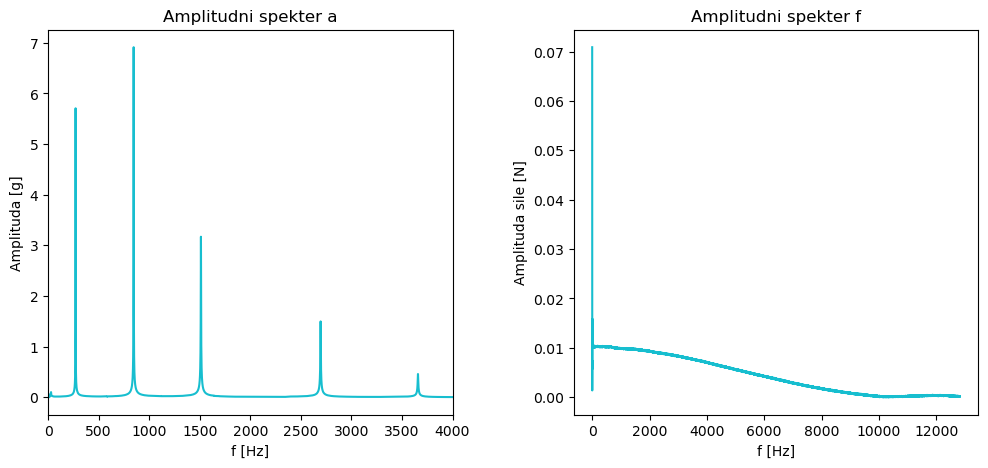

In [ ]:
dt = S10[0][1] - S10[0][0]
freq_10 = np.fft.rfftfreq(len(S10[0]), dt)
X_a = np.fft.rfft(S10[2], norm="forward");
X_f = np.fft.rfft(S10[1], norm="forward");

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))

ax1.set_title(f'Amplitudni spekter a')
ax1.plot(freq_10, abs(X_a), color='C9')
ax1.set_xlabel('f [Hz]')
ax1.set_ylabel('Amplituda [g]')
ax1.set_xlim(0,4000)

fig.subplots_adjust(wspace=0.3)

ax2.set_title('Amplitudni spekter f')
ax2.plot(freq_10, abs(X_f), color='C9')
ax2.set_xlabel('f [Hz]')
ax2.set_ylabel('Amplituda sile [N]');

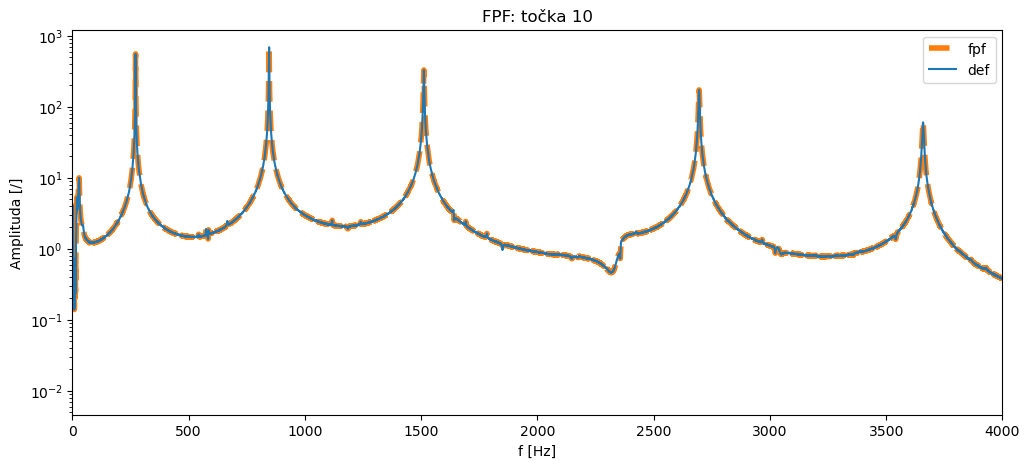

In [ ]:
FPF = X_a/X_f

fig, ax = plt.subplots(figsize=(12, 5))

ax.set_title(f'FPF: točka 10')
ax.semilogy(freq_10, abs(FPF),'--', lw=4,   color='C1', label='fpf')
ax.semilogy(freq10, abs(FPF10), label='def')
ax.set_xlabel('f [Hz]')
ax.set_ylabel('Amplituda [/]')
ax.set_xlim(0,4000);
ax.legend()

### Impulzna prenosna funkcija

Impulzna prenosna funkcija in frekvenčna prenosna funkcija predstavljata Fourierov par. Torej:
$$h(t) = \mathcal{F}^{-1} \{ \alpha(\omega)\}$$

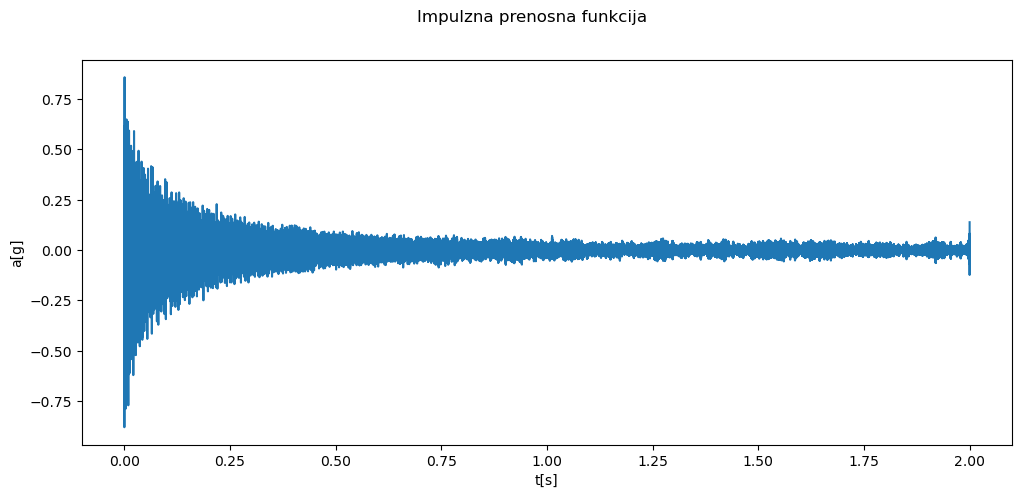

In [ ]:
h = np.fft.irfft(FPF);
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle("Impulzna prenosna funkcija")
ax.plot(S10[0]-tao10, h, label=f'h(t)')
ax.set_ylabel("a[g]")
ax.set_xlabel("t[s]");

In [ ]:
OKno = np.fft.rfft(h*w_exponential, norm="forward");

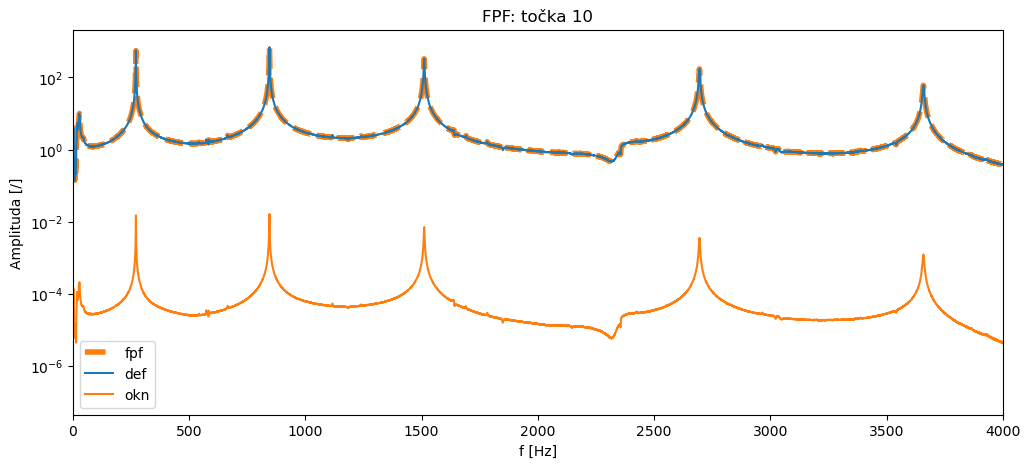

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.set_title(f'FPF: točka 10')
ax.semilogy(freq_10, abs(FPF),'--', lw=4,   color='C1', label='fpf')
ax.semilogy(freq10, abs(FPF10), label='def')
ax.semilogy(freq10, abs(OKno), label='okn')
ax.set_xlabel('f [Hz]')
ax.set_ylabel('Amplituda [/]')
ax.set_xlim(0,4000);
ax.legend()

### Vzbujanje z naključnim signalom

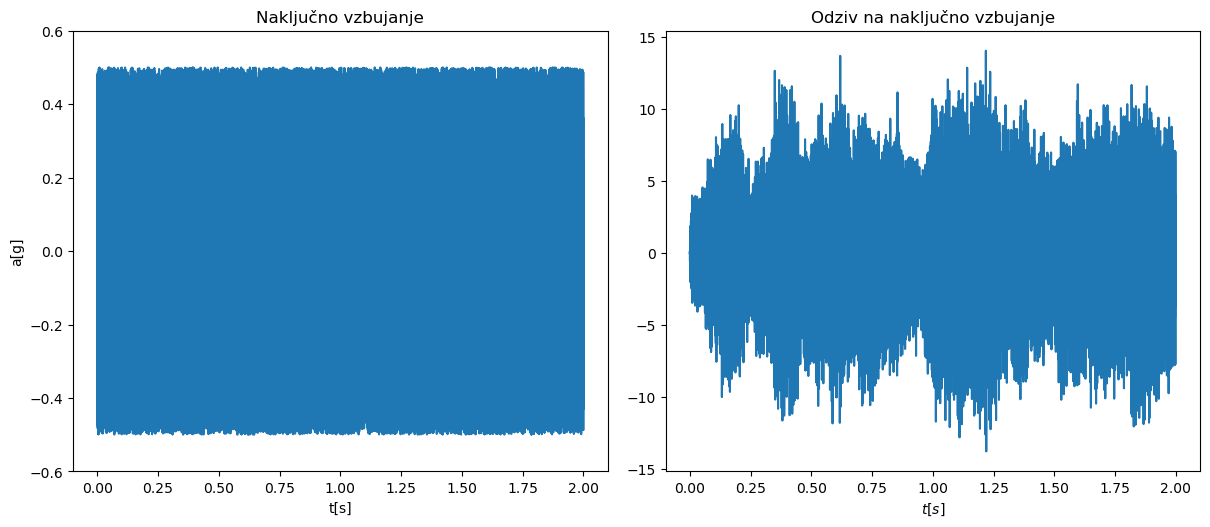

In [ ]:
t = S10[0]-tao10
nak_vzb = np.random.rand(len(t)) - 0.5 # definiramo naključni signal (npr. v okolizi točke 0)
odziv_2 = np.convolve(h, nak_vzb)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))
fig.tight_layout()

ax1.set_title('Naključno vzbujanje')
ax1.plot(t,nak_vzb)
ax1.set_ylim(-0.6, 0.6)
ax1.set_ylabel("a[g]")
ax1.set_xlabel("t[s]")

ax2.set_title('Odziv na naključno vzbujanje')
ax2.plot(t,odziv_2[:len(t)])
ax2.set_xlabel(f'$t [s]$');